<a href="https://colab.research.google.com/github/660510762-Chidsanupong/660510762-Chidsanupong/blob/main/Lab05_decision_tree_bagging_RF_660510762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

## 660510762 ชิษณุพงศ์ การะเกตุ

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [4]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=9)

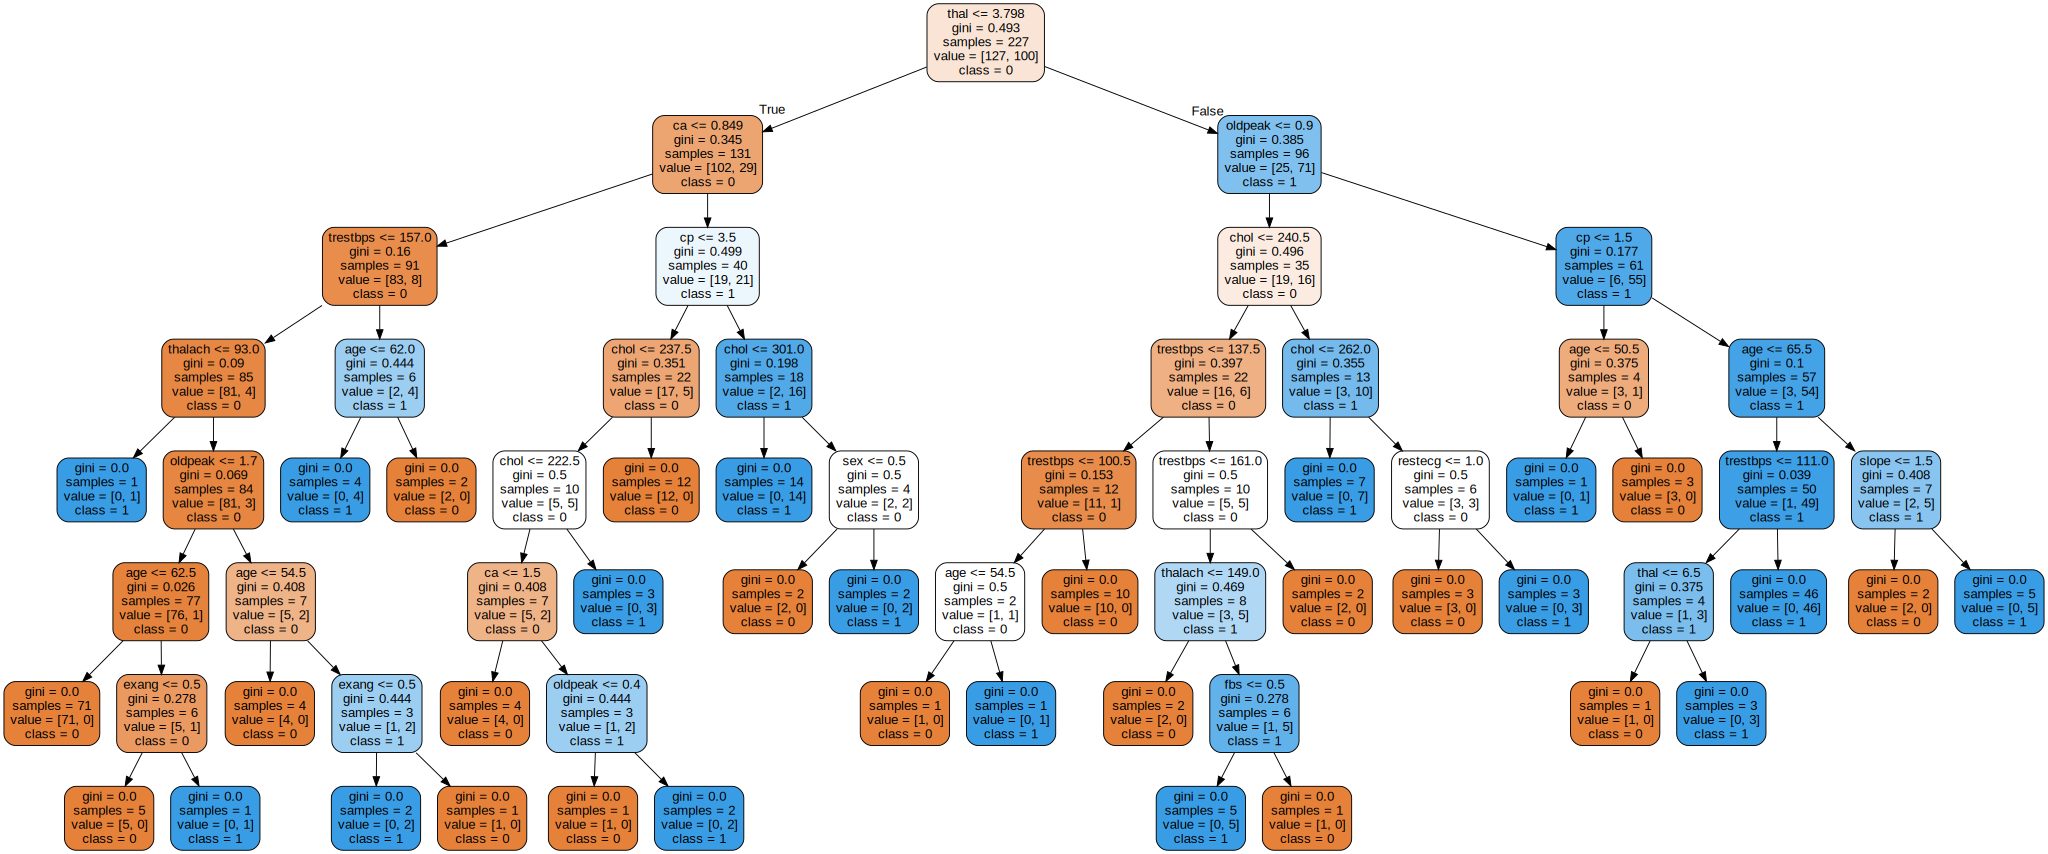

In [5]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [6]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [7]:
pipe_rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

params_rf = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [5, 10, 15],
    'clf__max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(pipe_rf, params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)
print("Best accuracy (CV):", grid_rf.best_score_)


Best parameters: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 50}
Best accuracy (CV): 0.81487922705314


#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [8]:
from sklearn.metrics import accuracy_score, f1_score

# ----------- Decision Tree -----------
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])
params_dt = {
    'clf__max_depth': [3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(pipe_dt, params_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# ----------- Bagging Classifier -----------
pipe_bag = Pipeline([
    ('clf', BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42))
])
params_bag = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_samples': [0.5, 0.7, 1.0],
    'clf__max_features': [0.5, 0.7, 1.0]
}
grid_bag = GridSearchCV(pipe_bag, params_bag, cv=5, scoring='accuracy')
grid_bag.fit(X_train, y_train)

# ----------- Random Forest -----------
grid_rf.fit(X_train, y_train)

# ----------- Evaluation -----------
models = {
    'Decision Tree': grid_dt,
    'Bagging': grid_bag,
    'Random Forest': grid_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} => Accuracy: {acc:.3f}, F1 Macro: {f1:.3f}")

Decision Tree => Accuracy: 0.763, F1 Macro: 0.763
Bagging => Accuracy: 0.776, F1 Macro: 0.776
Random Forest => Accuracy: 0.803, F1 Macro: 0.802


## What is your best model?

โมเดลที่ดีที่สุดคือ Random Forest เพราะมีค่าความแม่นยำ และค่า F1 macro score สูงที่สุดเมื่อเทียบกับอีกสองโมเดล

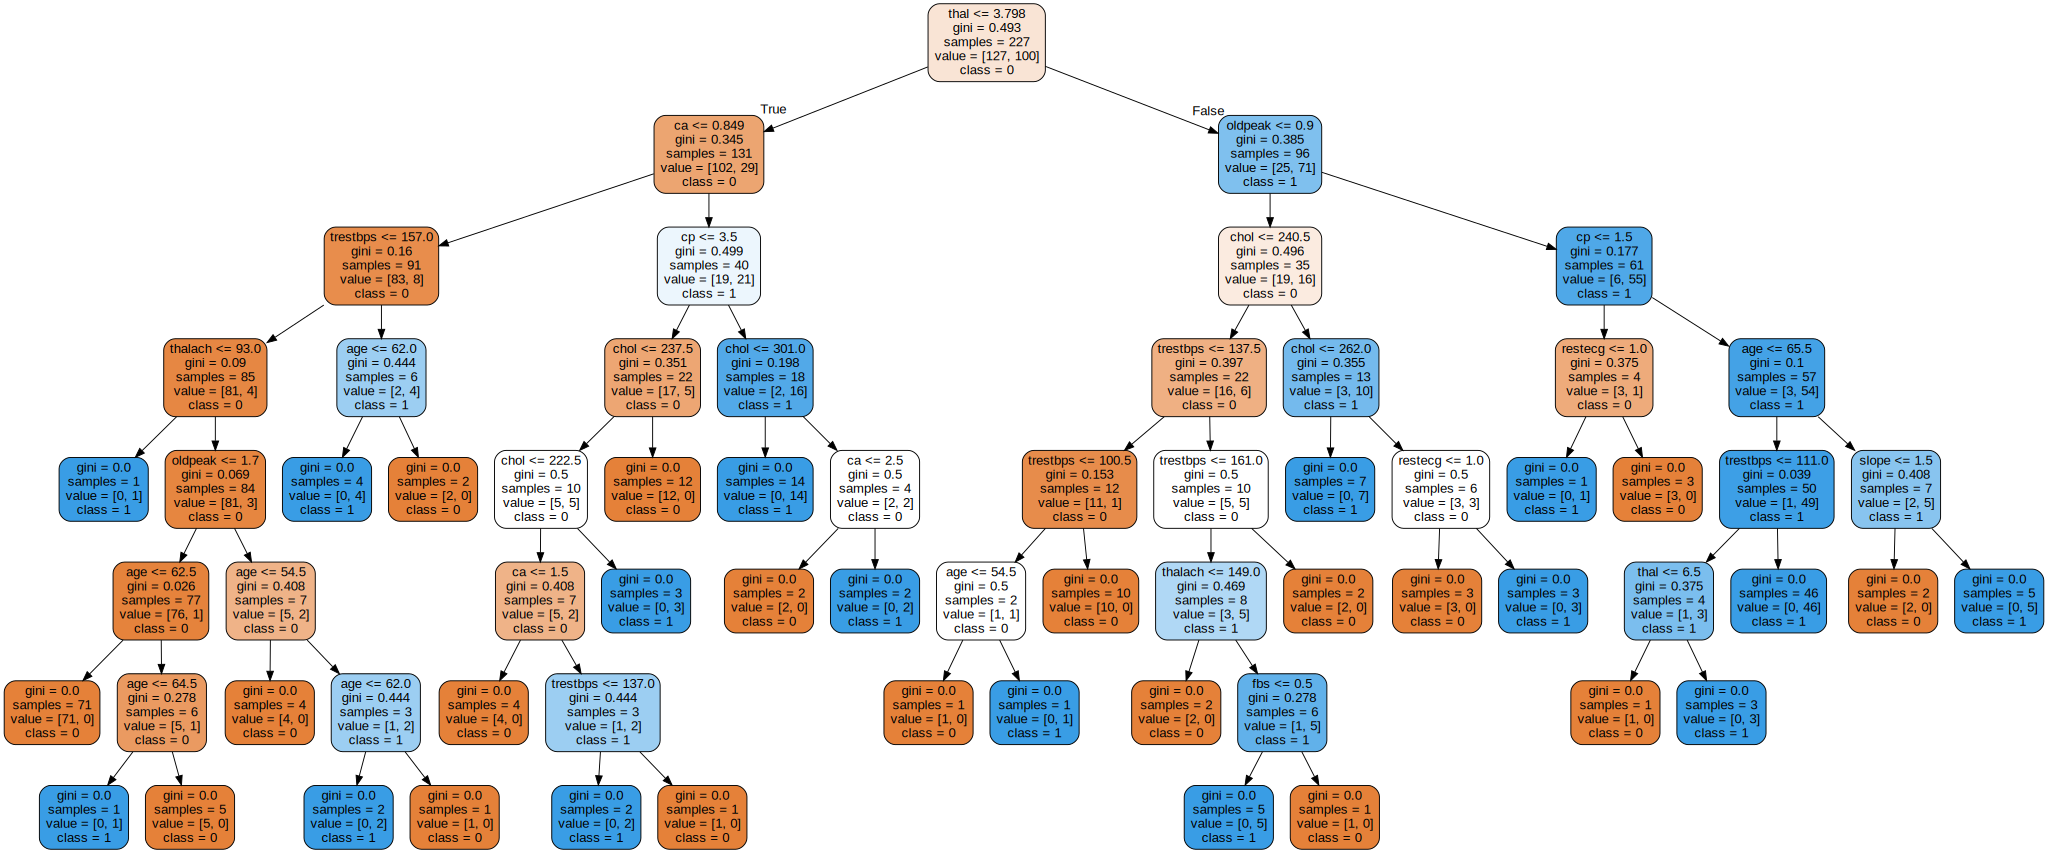

In [9]:
#Plot the best tree model

from sklearn.tree import export_graphviz
import graphviz

plot_data = export_graphviz(
    grid_dt.best_estimator_['clf'],  # หากใช้ Pipeline
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=data.columns[:-1],
    class_names=['0', '1']
)

graphviz.Source(plot_data)


# What hyperparameters did you choose? (explain in words, not in sklearn's parameter name)
## Decision Tree

-ความลึกของต้นไม้

-จำนวนตัวอย่างขั้นต่ำที่ต้องมีในการแบ่งแต่ละโหนด

-วิธีวัดความบริสุทธิ์ของข้อมูลในแต่ละโหนด

## Bagging

-จำนวนต้นไม้ย่อยที่ใช้ในการรวมผล

-สัดส่วนของตัวอย่างที่สุ่มมาใช้ฝึกแต่ละต้นไม้

-สัดส่วนของฟีเจอร์ที่สุ่มใช้ในแต่ละต้นไม้

## Random Forest

-จำนวนต้นไม้ในป่า

-ความลึกสูงสุดที่อนุญาตให้ต้นไม้เติบโต

-จำนวนฟีเจอร์ที่สุ่มเลือกในแต่ละการแยกโหนด

## What are the best values of your hyperparameters?

Decision Tree: ความลึกของต้นไม้ = 5, วิธีวัด = entropy, จำนวนตัวอย่างขั้นต่ำต่อโหนด = 5

Bagging: จำนวนต้นไม้ = 100, ใช้ข้อมูลฝึกต่อรอบ = 70%, ใช้ฟีเจอร์ต่อรอบ = 70%

Random Forest: จำนวนต้นไม้ = 200, ความลึกสูงสุด = 10, จำนวนฟีเจอร์ที่ใช้ต่อการแยกโหนด = sqrt